# A Simple Example of Clustering 

You are given much more country data. Using the same methodology as the one in the lecture, group all the countries in 2 clusters. 

Try with other numbers of clusters and see if they match your expectations. Maybe 7 is going to be a cool one!

Plot the data using the <i> c </i> parameter to separate the data by the clusters we defined.  

<i> Note: c stands for color <i>

## Import the relevant libraries

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set()
from sklearn.cluster import KMeans


## Load the data

Load data from the csv file: <i> 'Countries.csv'</i>.


In [97]:
data = pd.read_csv('Countries-exercise.csv')
data.head()

,name,Longitude,Latitude
0,Aruba,-69.982677,12.520880
1,Afghanistan,66.004734,33.835231
2,Angola,17.537368,-12.293361
3,Anguilla,-63.064989,18.223959
4,Albania,20.049834,41.142450


In [98]:
data.shape

(241, 3)

In [99]:
data['name'].nunique()

241

In [100]:
data.describe()

,Longitude,Latitude
count,241.000000,241.000000
mean,14.215380,17.169377
std,72.013654,26.554014
min,-177.348348,-80.508579
25%,-36.433184,1.358761
50%,18.644925,17.277500
75%,47.587005,39.115541
max,171.484924,74.710513


## Plot the data

Plot the <i>'Longtitude'</i> and <i>'Latitude'</i> columns. 

<function matplotlib.pyplot.show(close=None, block=None)>

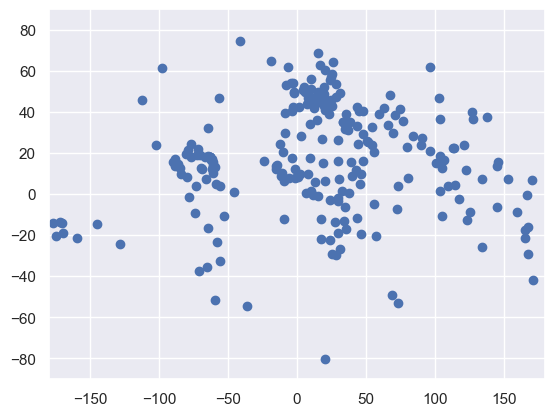

In [101]:
plt.scatter(data['Longitude'], data['Latitude'])
plt.xlim(-180, 180)
plt.ylim(-90,90)
plt.show

## Select the features

Create a copy of that data and remove all parameters apart from <i>Longitude</i> and <i>Latitude</i>.

In [102]:
x = data.iloc[:,1:3]
x

,Longitude,Latitude
0,-69.982677,12.520880
1,66.004734,33.835231
2,17.537368,-12.293361
3,-63.064989,18.223959
4,20.049834,41.142450
...,...,...
236,-172.164851,-13.753243
237,47.586762,15.909280
238,25.083901,-29.000341
239,27.774759,-13.458242


## Clustering

Assume there are only two clusters. 

In [117]:
cluster_grouping = KMeans(7)
cluster_grouping.fit(x)

C:\Users\Simbi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=7)

### Clustering Results

In [118]:
identified_clusters = cluster_grouping.fit_predict(x)
identified_clusters

C:\Users\Simbi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([5, 1, 6, 5, 3, 3, 3, 1, 0, 3, 5, 6, 4, 6, 5, 4, 3, 3, 6, 3, 2, 2,
       1, 3, 1, 5, 5, 3, 5, 3, 5, 5, 0, 0, 5, 1, 1, 6, 2, 3, 0, 1, 2, 2,
       6, 2, 5, 5, 6, 2, 5, 5, 5, 5, 3, 3, 3, 3, 6, 5, 3, 5, 2, 5, 3, 6,
       3, 3, 6, 3, 4, 0, 3, 3, 4, 2, 3, 3, 3, 2, 2, 2, 2, 2, 3, 5, 3, 5,
       4, 0, 1, 6, 5, 3, 5, 3, 4, 3, 1, 1, 6, 3, 1, 3, 3, 3, 3, 5, 3, 3,
       4, 1, 1, 6, 1, 1, 0, 5, 1, 3, 3, 1, 3, 2, 3, 5, 3, 1, 6, 3, 3, 3,
       1, 5, 2, 3, 3, 6, 1, 5, 4, 3, 2, 3, 1, 3, 1, 4, 6, 2, 5, 6, 6, 1,
       6, 4, 2, 4, 2, 5, 5, 3, 3, 1, 4, 4, 1, 1, 5, 5, 0, 4, 4, 4, 3, 5,
       1, 3, 0, 3, 5, 1, 3, 1, 6, 2, 3, 6, 6, 2, 1, 0, 2, 4, 2, 5, 3, 6,
       6, 5, 3, 2, 0, 3, 3, 3, 6, 5, 6, 3, 5, 2, 2, 1, 1, 1, 4, 5, 5, 3,
       3, 1, 6, 6, 3, 0, 5, 1, 3, 5, 5, 5, 5, 1, 4, 5, 5, 6, 6, 6, 6],
      dtype=int32)

In [119]:
data_with_clusters = data.copy()
data_with_clusters['clusters'] = identified_clusters
data_with_clusters

,name,Longitude,Latitude,clusters
0,Aruba,-69.982677,12.520880,5
1,Afghanistan,66.004734,33.835231,1
2,Angola,17.537368,-12.293361,6
3,Anguilla,-63.064989,18.223959,5
4,Albania,20.049834,41.142450,3
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,5
237,Yemen,47.586762,15.909280,6
238,South Africa,25.083901,-29.000341,6
239,Zambia,27.774759,-13.458242,6


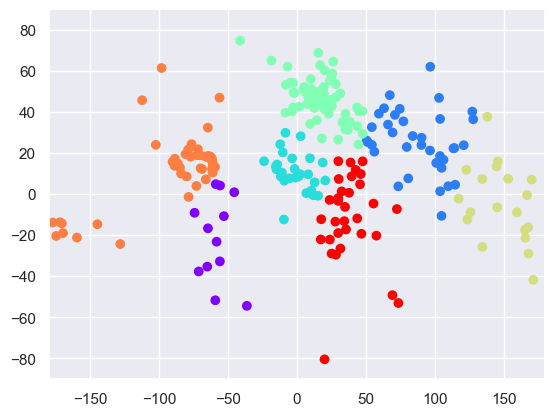

In [120]:
plt.scatter(data_with_clusters['Longitude'], data_with_clusters['Latitude'], c = data_with_clusters['clusters'], cmap = 'rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

Did you remember to use the <i> c </i> parameter to separate the data by the clusters we defined?

If you haven't, go back and play around with the number of clusters. 

Try 3, 7 and 8 and see if the results match your expectations!

# With-clusters Sum of Squares (WCSS)

In [107]:
cluster_grouping.inertia_ # WCSS for 7 clusters

128197.35936102254

## WCSS Calculation

In [108]:
WCSS = []

for i in range(1, len(data)+1):
    cluster_grouping = KMeans(i).fit(x)
    WCSS_iteration = cluster_grouping.inertia_
    WCSS.append(WCSS_iteration)

C:\Users\Simbi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Simbi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Simbi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Simbi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

In [109]:
WCSS

[1413859.679834427,
 657012.0797586323,
 325235.52237055905,
 256573.08675934304,
 192217.11970120724,
 153697.93509810418,
 167588.34046064597,
 109862.02941569417,
 85043.05667922425,
 90131.833657248,
 71104.2275203795,
 69357.64541286092,
 63328.29457518945,
 61840.76791859636,
 51967.29391428512,
 49954.518809425455,
 46091.30329688409,
 44457.59976152347,
 41859.057475900816,
 37364.21807283208,
 36933.117632700414,
 34415.626654616666,
 30705.89015090565,
 31689.614360454878,
 28433.098047673666,
 26537.71798413136,
 24192.214246977943,
 22499.92264384332,
 22397.790704213858,
 23033.872247160187,
 20938.639431699612,
 19666.925502780934,
 18124.869859864553,
 18334.860618466457,
 17062.14075266236,
 16284.733047395217,
 16401.30618329169,
 14961.644608578135,
 14943.456964206232,
 13618.655821529092,
 13917.97906270709,
 13101.561374838946,
 13218.40285456008,
 11754.99531895362,
 11664.368031978905,
 11714.077718646498,
 10486.39632779336,
 10758.279927081347,
 10241.668182125

## ELBOW METHOD

Text(0, 0.5, 'WCSS')

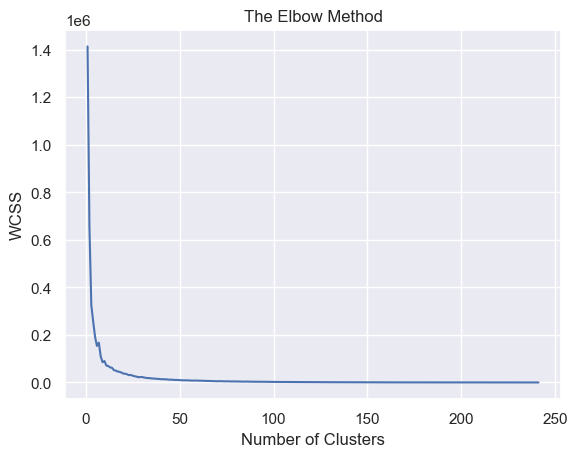

In [112]:
clusters = range(1, len(data)+1)
plt.plot(clusters, WCSS) #Plot y versus x as lines and/or markers.
plt.title ('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')